# Salary : Analytics

In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')

In [2]:
file = 'Salary_Data_Based_country_and_race.csv'

In [3]:
df = pd.read_csv(file)
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [4]:
df2 = df.drop(columns=['Unnamed: 0'],axis=1)
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [6]:
df2.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Null Values in total for each rows is less than 25% of the data. Therefore deleting null rows is Likely Possible

In [7]:
df2.dropna(inplace=True)

In [8]:
df2.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [9]:
df2.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [10]:
df2.Race.unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

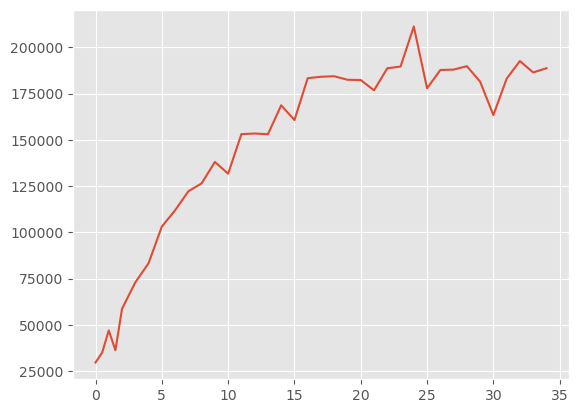

In [11]:
salary_ByExp = df2.groupby('Years of Experience')['Salary'].mean()
plt.plot(salary_ByExp)
plt.show()

In [12]:
df2['Years of Experience'].unique()

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. , 27. ,
       34. , 29. , 26. , 32. ])

In [21]:
# Apparently average salary on 30 Years Experience is lower than <30 Average let's see why

feats = ['Gender','Education Level','Country','Salary','Race']

selected = df2[(df2["Years of Experience"] == 29) | (df2["Years of Experience"] == 30)]
selected
# exp30 = df2[df2['Years of Experience'] == 30]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2387,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0,Australia,Australian
2467,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0,Canada,Black
2541,55.0,Female,PhD,Software Engineer Manager,30.0,183138.0,USA,African American
2543,54.0,Male,Bachelor's Degree,Senior Project Engineer,29.0,191915.0,Canada,Asian
2554,54.0,Other,High School,Senior Software Engineer,29.0,158254.0,China,White
2557,52.0,Female,PhD,Software Engineer Manager,29.0,194214.0,UK,White
2607,55.0,Female,Bachelor's Degree,Senior Project Engineer,30.0,183020.0,China,Chinese
2643,54.0,Male,Bachelor's Degree,Senior Software Engineer,30.0,186321.0,UK,Welsh
2787,55.0,Female,PhD,Software Engineer Manager,29.0,190543.0,UK,Welsh
2800,54.0,Other,High School,Senior Software Engineer,29.0,158966.0,Canada,Black


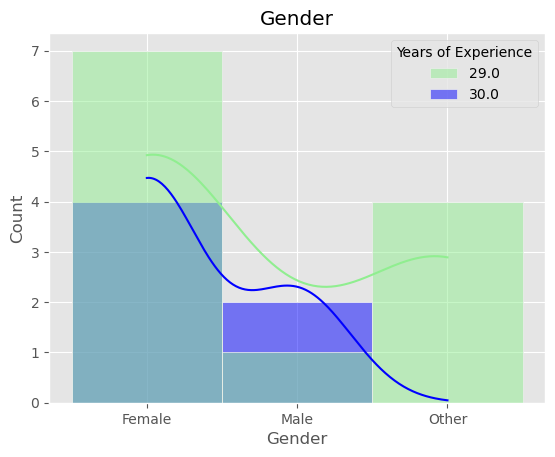

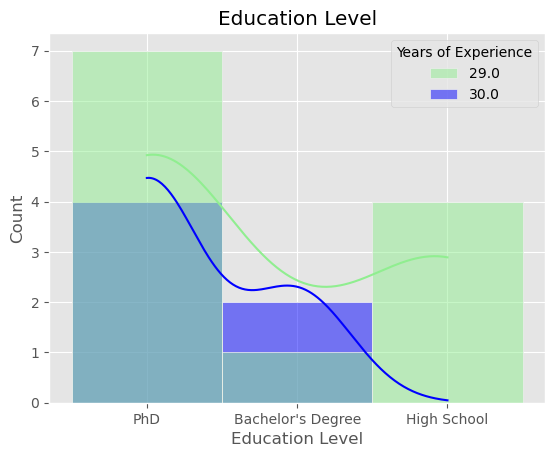

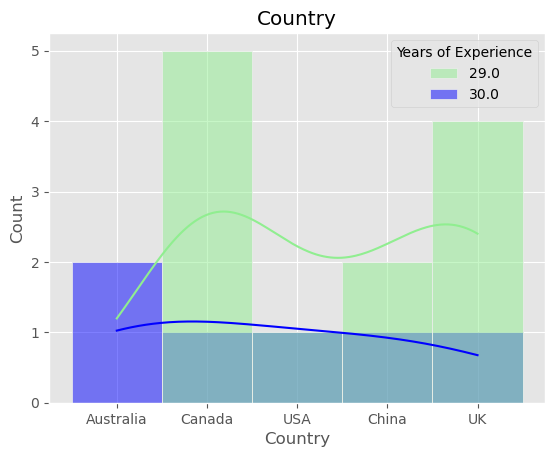

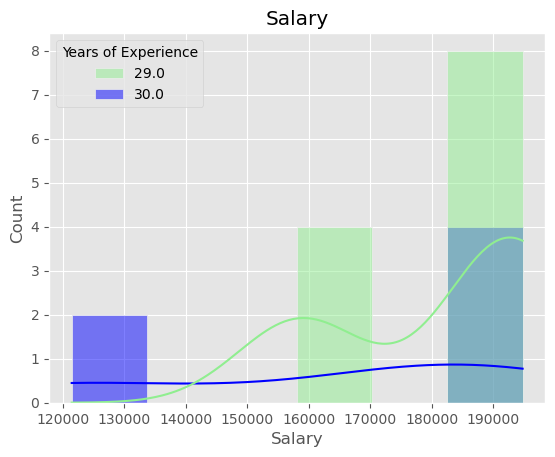

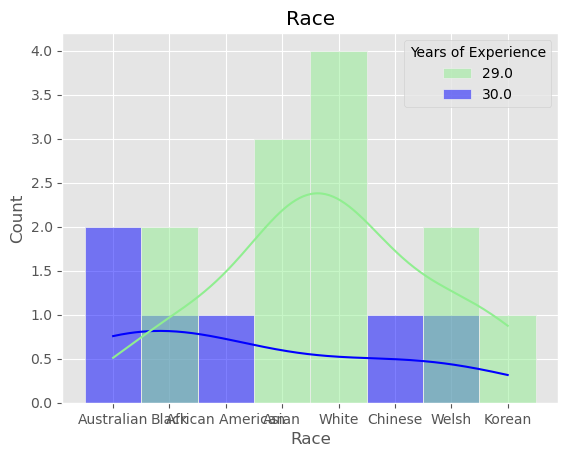

In [29]:
for cols in feats:
    sb.histplot(data = selected,x = selected[cols],kde=True, hue = 'Years of Experience',palette=['lightgreen', 'blue'])
    plt.title(cols)
    plt.show()

Based on graph above there is some difference that possibly lead to lowering the average salary on exp 30 beside Total count :
- Race. On exp 30 there is no White and Asian